## Naive Bayes on iris dataset from scretch

In [576]:
import pandas as pd
import numpy as np
import math

In [577]:
data = pd.read_csv('iris.csv')

In [578]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [579]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [580]:
#calculating the mean according to class
data_mean = data.groupby('species', as_index=False)['sepal_length','sepal_width','petal_length','petal_width'].mean()

In [581]:
data_mean

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.418,1.464,0.244
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [582]:
#calculating the standard deviation according to class
data_std = data.groupby('species').std()#['sepal_length','sepal_width','petal_length','petal_width'].stdev()

In [583]:
data_std

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.381024,0.173511,0.107210
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [584]:
import math
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent*10000000

In [585]:
# suffle the dataset
df = data.sample(frac=1)

In [586]:
x,y = df[['sepal_length','petal_width']],df['species']

In [587]:
x_train,y_train,x_test,y_test = x.head(105),y.head(105),x.tail(45),y.tail(45)

In [588]:
data_std['sepal_length'].head(1).values[0]

0.3524896872134513

In [589]:
#make prediction
s1 = 0.516171
m1 = 5.936
s2 = 0.197753
m2 = 1.326
d = x_test.values
#count = 0
probability = []
for j in d:
    itr=0
    prob=[0,0,0]
    for k in j:
        if itr == 0:
            prob[0] = calculateProbability(k, data_mean['sepal_length'].head(1).values[0], data_std['sepal_length'].head(1).values[0]) #for setosa class
            prob[1] = calculateProbability(k,m1,s1) #for versicolor class
            prob[2] = calculateProbability(k, data_mean['sepal_length'].tail(1).values[0], data_std['sepal_length'].tail(1).values[0]) #for virginica class
            
            
        if itr==1:
            prob[0] = prob[0]*calculateProbability(k, data_mean['petal_width'].head(1).values[0], data_std['petal_width'].head(1).values[0]) #for setosa class
            #print(calculateProbability(k, data_mean['petal_width'].head(1).values[0], data_std['petal_width'].head(1).values))
            prob[1] = prob[1]*calculateProbability(k,m2,s2) # for varsicolor
           # count = count+1
            prob[2] = prob[2]*calculateProbability(k, data_mean['petal_width'].tail(1).values[0], data_std['petal_width'].tail(1).values[0])#for virginica
        itr = itr +1
    probability.append(prob)
#print(count)

In [590]:
#probability of each class for test dataset
probability

[[373613198234237.06, 3829056.2031202544, 1486.7558854973622],
 [163324056087908.16, 93743.71533255395, 56.36752045698178],
 [332727790210559.9, 5142952.876569097, 2121.737369966564],
 [5.188840818469456e-08, 139237609107789.66, 1044478238836.9751],
 [8.654588943537078e-16, 63556282137252.35, 6784199473566.655],
 [387080932312434.5, 2745810.618786444, 1016.3585826240395],
 [23488963957175.176, 6835690518.230397, 1166945.452198019],
 [1.4476507415988698e-10, 103200003123457.78, 2650916044568.6646],
 [78229715387648.95, 1575439966.9885545, 389781.3274345598],
 [1.201074780395453e-78, 2449371.3857299197, 12008108892425.799],
 [6413.593690289248, 5345938530091.289, 2506877536.3911066],
 [5.391929130713893e-59, 336246019.9784985, 10796759652372.514],
 [2.3046757510467244e-16, 48615408250122.305, 6680967282442.089],
 [146862680557909.72, 254217.61746236932, 176.44406452285133],
 [1.433958550229528e-33, 8749744705448.756, 42360015289287.67],
 [30624245723316.715, 13728714.623316491, 10662.220

In [591]:
y_hat = []
for i in probability:
    num1 = i[0]
    num2 = i[1]
    num3 = i[2]
    if (num1 >= num2) and (num1 >= num3):
        y_hat.append("setosa")# = num1
    elif (num2 >= num1) and (num2 >= num3):
        y_hat.append("versicolor")#largest = num2
    else:
        y_hat.append("virginica")

In [592]:
y_hat

['setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'virginica']

In [594]:
true_predicted = 0
false_predicted = 0
y = y_test.values
for d in range(0,45):
    if y[d]==y_hat[d]:
        true_predicted+=1
    else:
        false_predicted+=1
print("Number of correctly classified points using Sklearn Implementation of Navie Bayes: ",true_predicted)
print("Number of incorrectly classified points using Sklearn Implementation of Navie Bayes: ",false_predicted)
print("Accuracy :",true_predicted/(true_predicted+false_predicted))

Number of correctly classified points using Sklearn Implementation of Navie Bayes:  43
Number of incorrectly classified points using Sklearn Implementation of Navie Bayes:  2
Accuracy : 0.9555555555555556


## sklearn imlementation of naive bayes

In [21]:
from sklearn.naive_bayes import GaussianNB as gnb
g = gnb()
g.fit(x_train[['sepal_length','petal_width']],y_train)
y_nv = g.predict(x_test[['sepal_length','petal_width']])

In [22]:
true_predicted = 0
false_predicted = 0
#y = y_test.values
for d in range(0,30):
    if y[d]==y_nv[d]:
        true_predicted+=1
    else:
        false_predicted+=1
print("Number of correctly classified points using Sklearn Implementation of Navie Bayes: ",true_predicted)
print("Number of incorrectly classified points using Sklearn Implementation of Navie Bayes: ",false_predicted)

Number of correctly classified points using Sklearn Implementation of Navie Bayes:  29
Number of incorrectly classified points using Sklearn Implementation of Navie Bayes:  1


-> From the above result we can see that we are getting equal accuracy in both the cases of implementation of Naive Bayes

## ANS b

#### Manually implemented active learning

In [149]:
import math
def calculateProbability1(x, mean, stdev):
    exponent = math.exp(-(math.pow(float(x)-float(mean),2)/(2*math.pow(float(stdev),2))))
    return float((1 / (math.sqrt(2*math.pi) * stdev)) * exponent)

In [64]:
df = df.sample(frac=1)

In [65]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
54,6.5,2.8,4.6,1.5,versicolor
131,7.9,3.8,6.4,2.0,virginica
81,5.5,2.4,3.7,1.0,versicolor
92,5.8,2.6,4.0,1.2,versicolor
135,7.7,3.0,6.1,2.3,virginica
41,4.5,2.3,1.3,0.3,setosa
129,7.2,3.0,5.8,1.6,virginica
20,5.4,3.4,1.7,0.2,setosa
110,6.5,3.2,5.1,2.0,virginica
74,6.4,2.9,4.3,1.3,versicolor


In [150]:
def cal_prob(d1,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32): 
    probability = []
    for j in d1:
            itr=0
            prob=[0,0,0]
            for k in j:
                #print(k)
                if itr == 0:
                    prob[0] = calculateProbability1(k,m11,s11) #for setosa class
                    prob[1] = calculateProbability1(k,m21,s21) #for versicolor class
                    prob[2] = calculateProbability1(k,m31,s31) #for virginica class
                if itr==1:
                    #print(k,m12,s12)
                    prob[0] = prob[0]*calculateProbability1(k,m12,s12) #for setosa class
                    #print(calculateProbability(k, data_mean['petal_width'].head(1).values[0], data_std['petal_width'].head(1).values))
                    prob[1] = prob[1]*calculateProbability1(k,m22,s22) # for varsicolor
                   # count = count+1
                    prob[2] = prob[2]*calculateProbability1(k,m32,s32)#for virginica
                itr = itr +1
            probability.append(prob)
    return probability

In [161]:
d1 = df[['sepal_length','petal_width']].tail(45).values

y = df['species'].tail(45).values
#print(len(d1))
l = 0
count = 0
mp = 16
for i in range(0,10):
    data = df.head(15+l)
   # print(data.iloc[mp-1:mp])
    if count!=0:
        #print(l+15)
        #print(mp)
        #data.iloc[mp, data.columns.get_loc('species')] = y_p
       # print(mp)
        data.species.iloc[[mp-1]] = y_p
        #print(data.species.iloc[[mp-1]])
        #print(data.iloc[mp-1:mp])
       # mp = mp+1
    count = count+1
    data_mean = data.groupby('species', as_index=False)['sepal_length','petal_width'].mean()
    data_std = data.groupby('species')['sepal_length','petal_width'].std()
    #y = data['species']
    std = data_std.values
    m = data_mean.values
    print(std)
    #print(m)
   # print(data_std)
    s11 = std[0][0]
    s12 = std[0][1]
    s21 = std[1][0]
    s22 = std[1][1]
    s31 = std[2][0]
    s32 = std[2][1]
    m11 = m[0][1]
    m12 = m[0][2]
    m21 = m[1][1]
    m22 = m[1][2]
    m31 = m[2][1]
    m32 = m[2][2]
    #probability = []
    probability = cal_prob(d1,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32)
    l+=1
    y_hat = []
    for i in probability:
            num1 = i[0]
            num2 = i[1]
            num3 = i[2]
            if (num1 >= num2) and (num1 >= num3):
                y_hat.append("setosa")# = num1
            elif (num2 >= num1) and (num2 >= num3):
                y_hat.append("versicolor")#largest = num2
            else:
                y_hat.append("virginica")
    true_predicted = 0
    false_predicted = 0
    print(len((y_hat)))   
    for d in range(0,45):
            if y[d]==y_hat[d]:
                true_predicted+=1
            else:
                false_predicted+=1
                
    x_p = df.iloc[l+15:l+16]
    print(x_p)
    prob_x_p = cal_prob(x_p[['sepal_length','petal_width']].values,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32)
    num1 = prob_x_p[0][0]
    num2 = prob_x_p[0][1]
    num3 = prob_x_p[0][2]
    y_p = ""
    if (num1 >= num2) and (num1 >= num3):
                y_p = "setosa"# = num1
    elif (num2 >= num1) and (num2 >= num3):
                y_p = "versicolor"#largest = num2
    else:
                y_p = "virginica"
    print(y_p)
    #print(y_p)
    print("Number of correctly classified points in Implementation of Navie Bayes: ",true_predicted)
    print("Number of incorrectly classified points in Implementation of Navie Bayes: ",false_predicted)
    print("==="*30)
    #break

[[0.55075705 0.05773503]
 [0.41593269 0.21213203]
 [0.68278143 0.23603874]]
45
     sepal_length  sepal_width  petal_length  petal_width     species
122           7.7          2.8           6.7          2.0  versicolor
virginica
Number of correctly classified points in Implementation of Navie Bayes:  41
Number of incorrectly classified points in Implementation of Navie Bayes:  4
[[0.55075705 0.05773503]
 [0.41593269 0.21213203]
 [0.73180306 0.25495098]]
45
     sepal_length  sepal_width  petal_length  petal_width    species
119           6.0          2.2           5.0          1.5  virginica
versicolor
Number of correctly classified points in Implementation of Navie Bayes:  40
Number of incorrectly classified points in Implementation of Navie Bayes:  5
[[0.55075705 0.05773503]
 [0.7158079  0.32071349]
 [0.68278143 0.23603874]]
45
     sepal_length  sepal_width  petal_length  petal_width    species
147           6.5          3.0           5.2          2.0  virginica
virginica
Number of 

c:\users\karan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


[[0.55075705 0.05773503]
 [0.77308904 0.34302575]
 [0.7130529  0.26436507]]
45
     sepal_length  sepal_width  petal_length  petal_width    species
134           6.1          2.6           5.6          1.4  virginica
versicolor
Number of correctly classified points in Implementation of Navie Bayes:  41
Number of incorrectly classified points in Implementation of Navie Bayes:  4
[[0.55075705 0.05773503]
 [0.68855439 0.37701838]
 [0.698212   0.25873624]]
45
     sepal_length  sepal_width  petal_length  petal_width    species
105           7.6          3.0           6.6          2.1  virginica
virginica
Number of correctly classified points in Implementation of Navie Bayes:  41
Number of incorrectly classified points in Implementation of Navie Bayes:  4
[[0.55075705 0.05773503]
 [0.72899148 0.40590874]
 [0.7068496  0.2910795 ]]
45
     sepal_length  sepal_width  petal_length  petal_width    species
118           7.7          2.6           6.9          2.3  virginica
virginica
Number of co

In [542]:
d1 = df[['sepal_length','petal_width']].tail(45).values
val=1
y = df['species'].tail(45).values
#print(len(d1))
l = 0
count = 0
mp = 16
p=0
accuracy = []
for i in range(0,5):
    p = p+1
    if count!=0:
        frames = [data,x1]
        data = pd.concat(frames)
    else:
        data = df.head(10)
    count = count+1
    

    print("shape",data.shape)
    count = count+1
    data_mean = data.groupby('species', as_index=False)['sepal_length','petal_width'].mean()
    data_std = data.groupby('species')['sepal_length','petal_width'].std()
    #y = data['species']
    std = data_std.values
    m = data_mean.values
    print(std)
    #print(m)
   # print(data_std)
    s11 = std[0][0]
    s12 = std[0][1]
    s21 = std[1][0]
    s22 = std[1][1]
    s31 = std[2][0]
    s32 = std[2][1]
    m11 = m[0][1]
    m12 = m[0][2]
    m21 = m[1][1]
    m22 = m[1][2]
    m31 = m[2][1]
    m32 = m[2][2]
    #probability = []
    probability = cal_prob(d1,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32)
    l = l+10
    y_hat = []
    for i in probability:
            num1 = i[0]
            num2 = i[1]
            num3 = i[2]
            if (num1 >= num2) and (num1 >= num3):
                y_hat.append("setosa")# = num1
            elif (num2 >= num1) and (num2 >= num3):
                y_hat.append("versicolor")#largest = num2
            else:
                y_hat.append("virginica")
    true_predicted = 0
    false_predicted = 0
  
    for d in range(0,45):
            if y[d]==y_hat[d]:
                true_predicted+=1
            else:
                false_predicted+=1
    val = val+.01            
    #x_p = df.iloc[l+15:l+20]
    #print(x_p)
    x_p = df.sample(n=10,replace = True)
    prob_x_p = cal_prob(x_p[['sepal_length','petal_width']].values,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32)
    num1 = prob_x_p[0][0]
    num2 = prob_x_p[0][1]
    num3 = prob_x_p[0][2]
    y_p = []
    for i in prob_x_p:
            num1 = i[0]
            num2 = i[1]
            num3 = i[2]
            if (num1 >= num2) and (num1 >= num3):
                y_p.append("setosa")
            elif (num2 >= num1) and (num2 >= num3):
                y_p.append("versicolor")
            else:
                y_p.append("virginica")
    x1 = x_p
    print(x1.shape)
    print(len(y_p))
    x1 = x1.drop(['species'],axis=1)
    x1['species'] = y_p
    print("Number of correctly classified points in Implementation of Navie Bayes: ",true_predicted)
    print("Number of incorrectly classified points in Implementation of Navie Bayes: ",false_predicted)
    print("==="*30)
    
    x =(true_predicted/(true_predicted+false_predicted))*val
    
    print(x)
    accuracy.append(x)
print(accuracy)

shape (10, 5)
[[0.21213203 0.14142136]
 [0.25166115 0.1       ]
 [0.6503845  0.33166248]]
(10, 5)
10
Number of correctly classified points in Implementation of Navie Bayes:  38
Number of incorrectly classified points in Implementation of Navie Bayes:  7
0.8528888888888889
shape (20, 5)
[[0.23380904 0.11690452]
 [0.25166115 0.1       ]
 [0.59298935 0.33709993]]
(10, 5)
10
Number of correctly classified points in Implementation of Navie Bayes:  37
Number of incorrectly classified points in Implementation of Navie Bayes:  8
0.8386666666666667
shape (30, 5)
[[0.32601822 0.12060454]
 [0.23629078 0.12909944]
 [0.55805786 0.31666185]]
(10, 5)
10
Number of correctly classified points in Implementation of Navie Bayes:  39
Number of incorrectly classified points in Implementation of Navie Bayes:  6
0.8926666666666667
shape (40, 5)
[[0.31235253 0.11875422]
 [0.26726124 0.21380899]
 [0.71102224 0.29037181]]
(10, 5)
10
Number of correctly classified points in Implementation of Navie Bayes:  39
Numb

## (2)

In [547]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
np.random.seed(0)

In [551]:
df=pd.read_csv('submission.csv')
dataset_train = df.sample(n=20, random_state=0)

In [552]:
l =  GaussianNB()
l.fit(dataset_train[['x','y']], dataset_train['class'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [553]:
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

In [554]:
source = pd.DataFrame({'x': xx.ravel(),
                     'y': yy.ravel(),
                     'z': Z.ravel()})

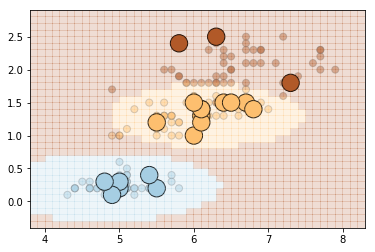

In [555]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [556]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

60

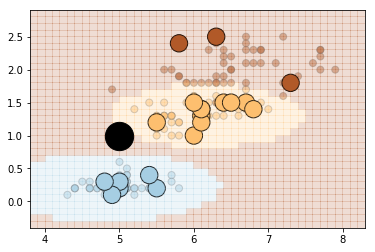

In [557]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [558]:
new_dataset_train = dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
114,5.8,2.4,2.0
62,6.0,1.0,1.0
33,5.5,0.2,0.0
107,7.3,1.8,2.0
7,5.0,0.2,0.0
100,6.3,2.5,2.0
40,5.0,0.3,0.0
86,6.7,1.5,1.0
76,6.8,1.4,1.0
71,6.1,1.3,1.0


In [559]:
from sklearn.naive_bayes import GaussianNB as gnb
l = gnb()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

In [560]:
new_dataset_train['x'].shape,df['class'].shape,df['x'].shape

((21,), (150,), (150,))

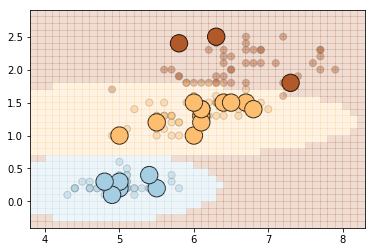

In [561]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [562]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

129

In [563]:
df.iloc[least_confident_ix]['class']

2.0

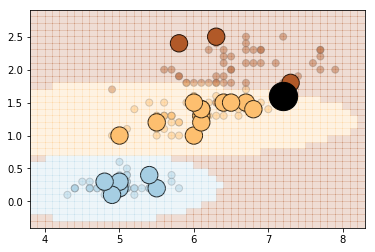

In [564]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [565]:
new_dataset_train = new_dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
114,5.8,2.4,2.0
62,6.0,1.0,1.0
33,5.5,0.2,0.0
107,7.3,1.8,2.0
7,5.0,0.2,0.0
100,6.3,2.5,2.0
40,5.0,0.3,0.0
86,6.7,1.5,1.0
76,6.8,1.4,1.0
71,6.1,1.3,1.0


In [568]:
l = gnb()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

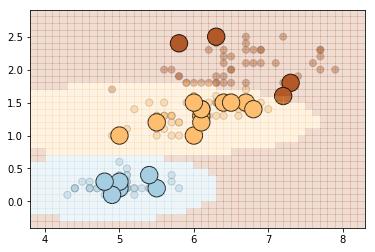

In [569]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [570]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

106

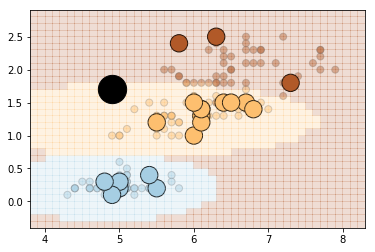

In [571]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [572]:
new_dataset_train = new_dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
114,5.8,2.4,2.0
62,6.0,1.0,1.0
33,5.5,0.2,0.0
107,7.3,1.8,2.0
7,5.0,0.2,0.0
100,6.3,2.5,2.0
40,5.0,0.3,0.0
86,6.7,1.5,1.0
76,6.8,1.4,1.0
71,6.1,1.3,1.0


In [573]:
l = LogisticRegression()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

c:\users\karan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\karan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


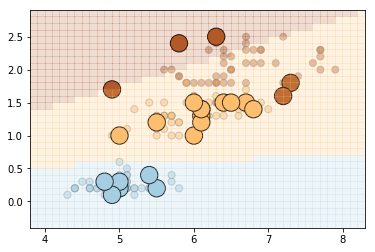

In [574]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

### (3)

In [ ]:
df=pd.read_csv('submission.csv')
dataset_train = df.sample(n=20, random_state=0)
dataset_train

In [535]:


np.random.seed(lp)
d1 = df[['sepal_length','petal_width']].tail(45).values
y = df['species'].tail(45).values
#print(len(d1))
l = 0
count = 0
mp = 16
p=0
accuracy1 = []
for i in range(0,5):
    p = p+1
    if count!=0:
        frames = [data,x1]
        data = pd.concat(frames)
    else:
        data = df.head(10)
    count = count+1


    print(data.shape)
    count = count+1
    data_mean = data.groupby('species', as_index=False)['sepal_length','petal_width'].mean()
    data_std = data.groupby('species')['sepal_length','petal_width'].std()
    #y = data['species']
    std = data_std.values
    m = data_mean.values
    print(std)
    #print(m)
   # print(data_std)
    s11 = std[0][0]
    s12 = std[0][1]
    s21 = std[1][0]
    s22 = std[1][1]
    s31 = std[2][0]
    s32 = std[2][1]
    m11 = m[0][1]
    m12 = m[0][2]
    m21 = m[1][1]
    m22 = m[1][2]
    m31 = m[2][1]
    m32 = m[2][2]
    #probability = []
    probability = cal_prob(d1,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32)
    l = l+10
    y_hat = []
    for i in probability:
            num1 = i[0]
            num2 = i[1]
            num3 = i[2]
            if (num1 >= num2) and (num1 >= num3):
                y_hat.append("setosa")# = num1
            elif (num2 >= num1) and (num2 >= num3):
                y_hat.append("versicolor")#largest = num2
            else:
                y_hat.append("virginica")
    true_predicted = 0
    false_predicted = 0

    for d in range(0,45):
            if y[d]==y_hat[d]:
                true_predicted+=1
            else:
                false_predicted+=1

    #x_p = df.iloc[l+15:l+20]
    #print(x_p)
    x_p = df.sample(n=10,random_state=p,replace = False)
    prob_x_p = cal_prob(x_p[['sepal_length','petal_width']].values,m11,s11,m21,s21,m31,s31,m12,s12,m22,s22,m32,s32)
    num1 = prob_x_p[0][0]
    num2 = prob_x_p[0][1]
    num3 = prob_x_p[0][2]
    y_p = []
    for i in prob_x_p:
            num1 = i[0]
            num2 = i[1]
            num3 = i[2]
            if (num1 >= num2) and (num1 >= num3):
                y_p.append("setosa")
            elif (num2 >= num1) and (num2 >= num3):
                y_p.append("versicolor")
            else:
                y_p.append("virginica")
    x1 = x_p
    print(x1.shape)
    print(len(y_p))
    x1 = x1.drop(['species'],axis=1)
    x1['species'] = y_p
    print("Number of correctly classified points in Implementation of Navie Bayes: ",true_predicted)
    print("Number of incorrectly classified points in Implementation of Navie Bayes: ",false_predicted)
    print("==="*30)

    x =(true_predicted/(true_predicted+false_predicted))
    print(x)
    accuracy1.append(x)


(10, 5)
[[0.21213203 0.14142136]
 [0.25166115 0.1       ]
 [0.6503845  0.33166248]]
(10, 5)
10
Number of correctly classified points in Implementation of Navie Bayes:  38
Number of incorrectly classified points in Implementation of Navie Bayes:  7
0.8444444444444444
(20, 5)
[[0.33714487 0.09831921]
 [0.22173558 0.12909944]
 [0.70364132 0.33333333]]
(10, 5)
10
Number of correctly classified points in Implementation of Navie Bayes:  39
Number of incorrectly classified points in Implementation of Navie Bayes:  6
0.8666666666666667
(30, 5)
[[0.42654946 0.10137938]
 [0.22951813 0.16690459]
 [0.73318763 0.29569562]]
(10, 5)
10
Number of correctly classified points in Implementation of Navie Bayes:  41
Number of incorrectly classified points in Implementation of Navie Bayes:  4
0.9111111111111111
(40, 5)
[[0.40606513 0.10749677]
 [0.26505926 0.1493576 ]
 [0.73224072 0.27399549]]
(10, 5)
10
Number of correctly classified points in Implementation of Navie Bayes:  43
Number of incorrectly classi

In [543]:
accuracy1

[0.8444444444444444,
 0.8666666666666667,
 0.9111111111111111,
 0.9555555555555556,
 0.9555555555555556]

In [544]:
accuracy

[0.8528888888888889,
 0.8386666666666667,
 0.8926666666666667,
 0.9013333333333334,
 0.9566666666666667]

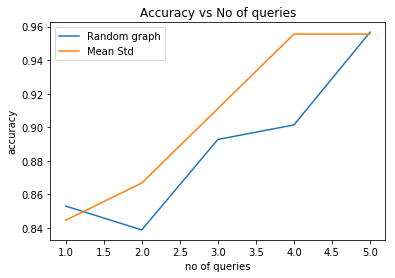

In [575]:
plt.plot([1,2,3,4,5],accuracy)
plt.plot([1,2,3,4,5],accuracy1)
plt.title("Accuracy vs No of queries")
plt.xlabel("no of queries")
plt.ylabel("accuracy")
plt.legend(["Random graph","Mean Std"])
plt.show()

1. From the above graph we can see that we are getting an increase in accuracy as the no of queries are increasing as my training data is increasing. 
2. I am getting higher acc in case when i am using mean std.